## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study
There are quite a few goals for this case study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

__The steps are we are using broadly as:__

1. Reading and understanding the data
2. Cleaning the data
3. Preparing data for Model Building
4. Model Building
5. Model Evaluation
6. Making Predictions on the Test Set

In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
pd.options.display.max_columns=None

## Step 1 :- Read and Understand data

In [2]:
# importing data set
lead_df=pd.read_csv("Leads.csv")

In [3]:
# Checking head of dataframe
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Checking shape of dataframe
lead_df.shape

(9240, 37)

In [5]:
# Checking info of dataframe
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# using describe to check dataframe
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

#### Since we have certain columns have null value so we have to check and clean dataset

## Step 2:- Data Cleaning and Preparation

In [7]:
# checking count of null values in each column
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# drop columns have null values>3300
for col in lead_df.columns:
    if lead_df[col].isnull().sum() >3300:
        lead_df.drop(col,axis=1,inplace=True)


In [9]:
# Again checking null values sum
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As we analysed dataframe we get to know there are certain columns which we can drop for simplicity of our analysis from dataframe

In [10]:
# creating a list of columns to drop
col_to_drop = ['Prospect ID','Lead Number','City','Country','Do Not Call','What matters most to you in choosing a course', 
               'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque']

In [11]:
# dropping columns from dataframe
lead_df.drop(col_to_drop,axis=1,inplace=True)

In [12]:
# Checking dataframe again after dropping columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          7802 non-null   object 
 9   How did you hear about X Education      7033 non-null   object 
 10  What is your current occupation         6550 non-null   obje

#### Checking categories of values columns having

In [13]:
# checking and printing value counts of each columns
for colmn in lead_df:
    print(lead_df[colmn].astype('category').value_counts())
    print('=========================================')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
Converted
0    5679
1    3561
Name: count, dtype: int64
TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0

In [14]:
# checking null values
lead_df.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
How did you hear about X Education        2207
What is your current occupation           2690
Lead Profile                              2709
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [15]:
# Dropping columns which has high count of select in it
lead_df.drop(['How did you hear about X Education','Lead Profile'],axis=1,
            inplace = True)

In [16]:
# Checking null values again
lead_df.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

#### Dropping null values from columns

In [17]:
# Dropping null values from What is your current occupation column and updating dataframe
lead_df = lead_df[~pd.isnull(lead_df['What is your current occupation'])]

In [18]:
# Checking dataframe after dropping null values
lead_df.isnull().sum()

Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [19]:
# Dropping null values from TotalVisits column and updating dataframe
lead_df = lead_df[~pd.isnull(lead_df['TotalVisits'])]

In [20]:
lead_df.isnull().sum()

Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [21]:
# Dropping null values from Lead Source column and updating dataframe
lead_df = lead_df[~pd.isnull(lead_df['Lead Source'])]

In [22]:
lead_df.isnull().sum()

Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [23]:
# Dropping null values from Specialization  column and updating dataframe
lead_df = lead_df[~pd.isnull(lead_df['Specialization'])]

In [24]:
lead_df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [25]:
# Checking dataframe
lead_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [26]:
print(len(lead_df.index))
print(len(lead_df.index)/9240)

6373
0.6897186147186147


__after removal of null values we still have approx 69 % values so we can go ahead__

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

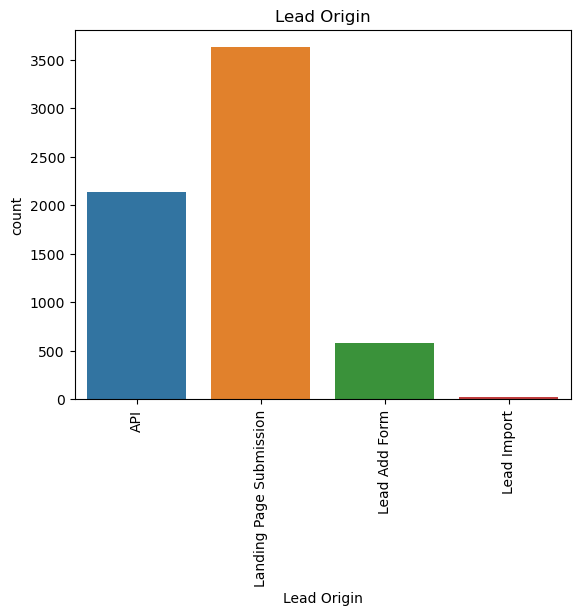

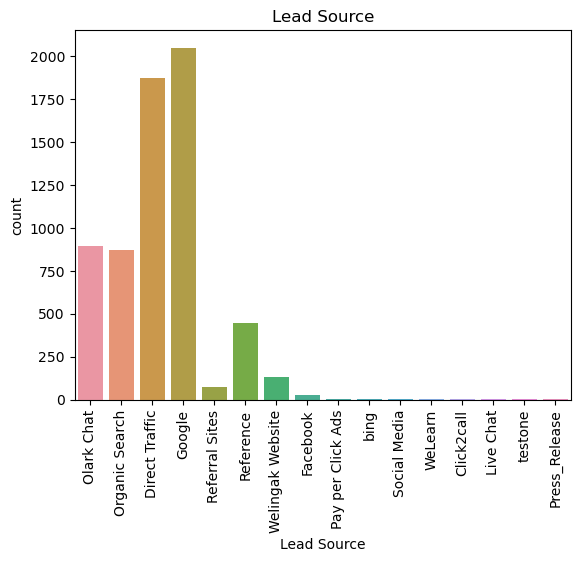

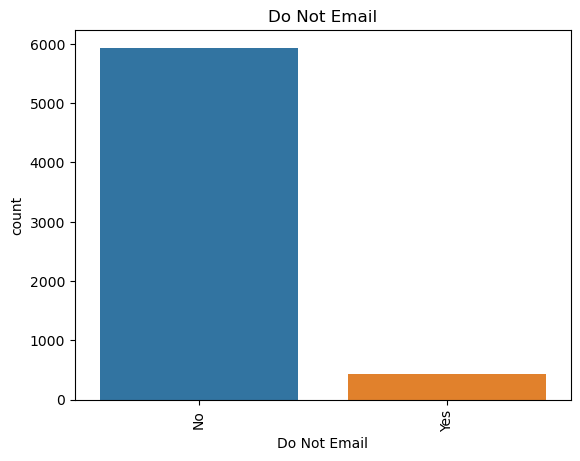

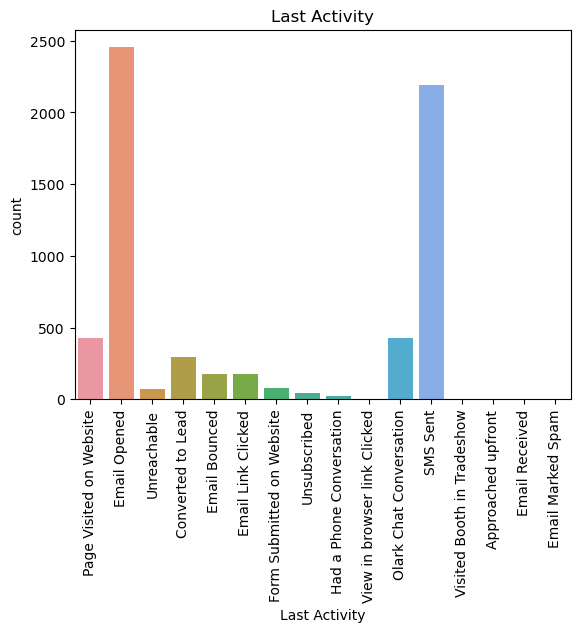

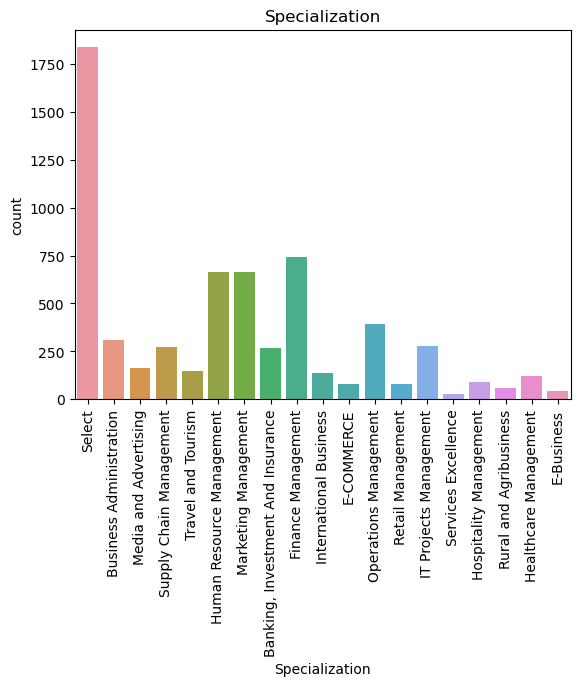

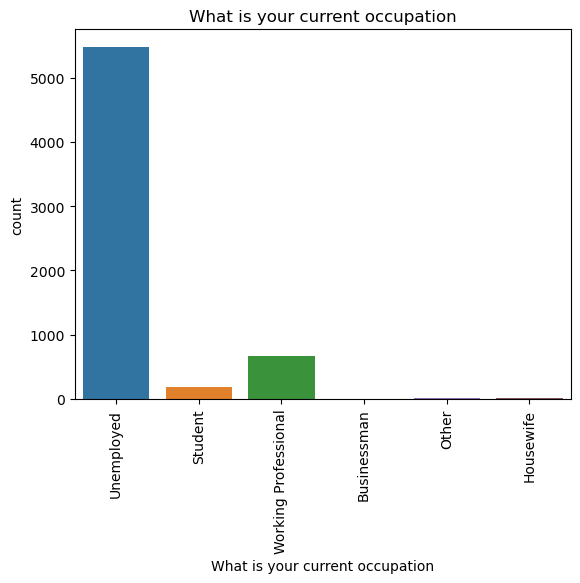

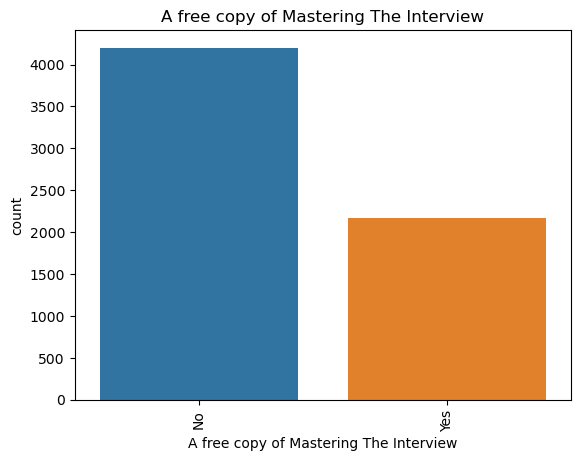

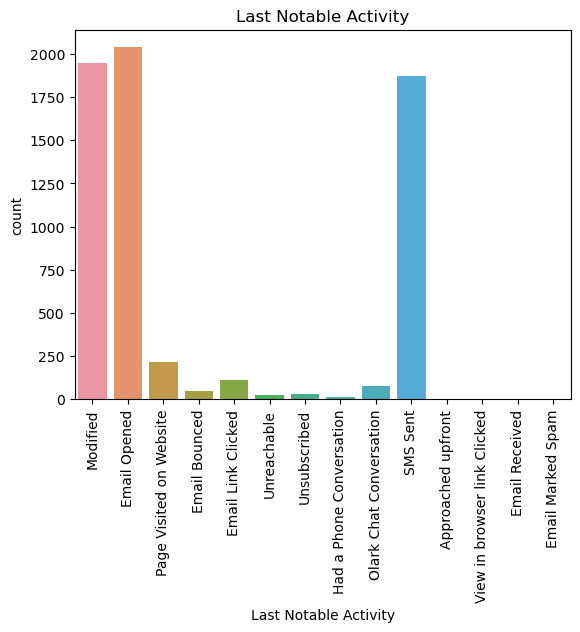

In [45]:
# plotting countplot for categorical variables to see demands
cat_columns=['Lead Origin','Lead Source','Do Not Email',
            'Last Activity','Specialization','What is your current occupation',
             'A free copy of Mastering The Interview','Last Notable Activity']
for i in cat_columns:
    plt.title(i)
    sns.countplot(data=lead_df, x=i)
    plt.xticks(rotation=90)
    plt.show()

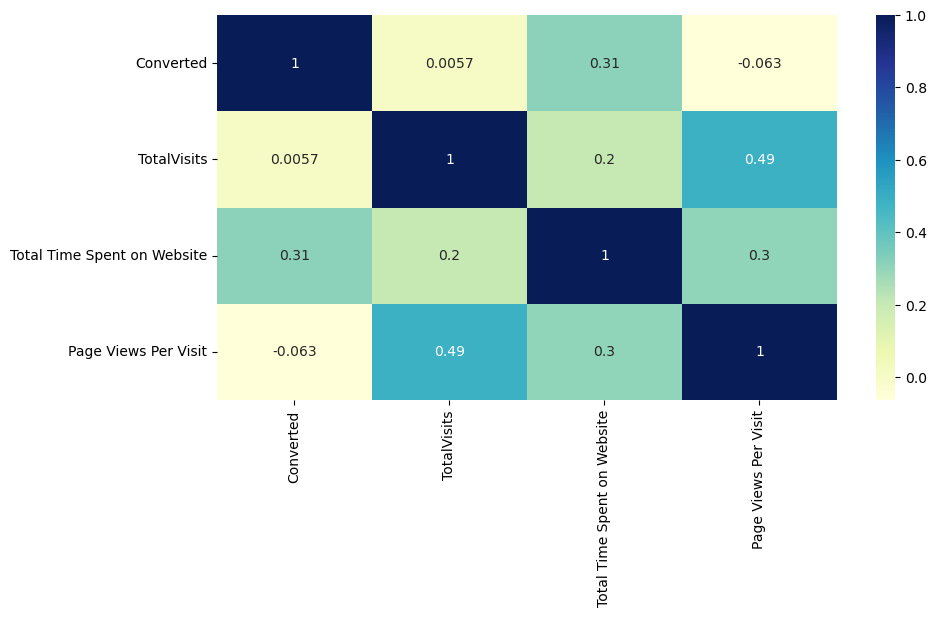

In [51]:
# plotting heatmap for continous columns 
plt.figure(figsize=[10,5])
sns.heatmap(lead_df.corr(numeric_only=True),annot=True,cmap='YlGnBu')
plt.show()

## Step 3:- Preparing the data for model building

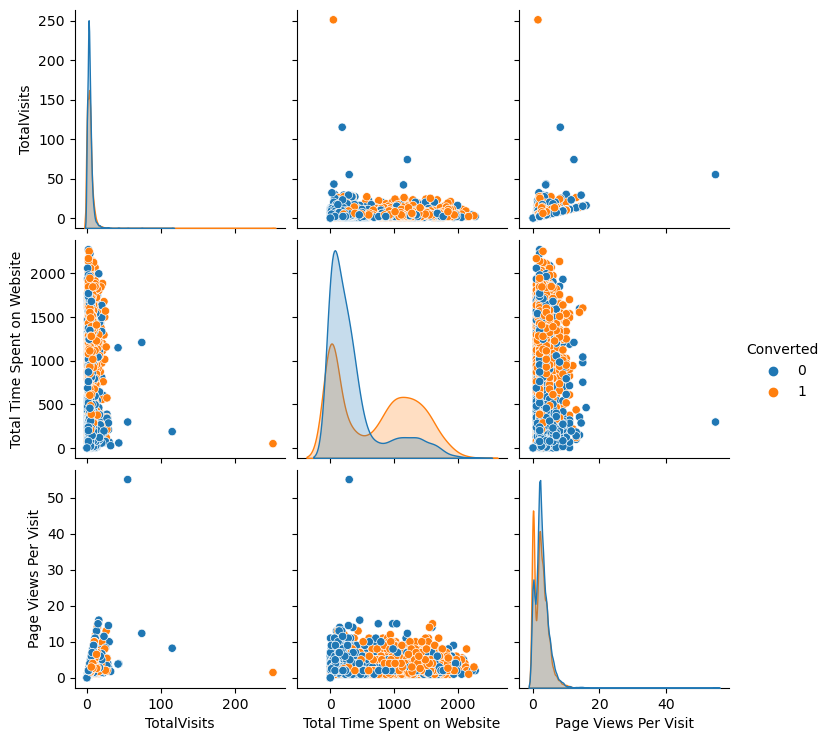

In [52]:
# preparing pair plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(lead_df,diag_kind='kde',hue='Converted')
plt.show()

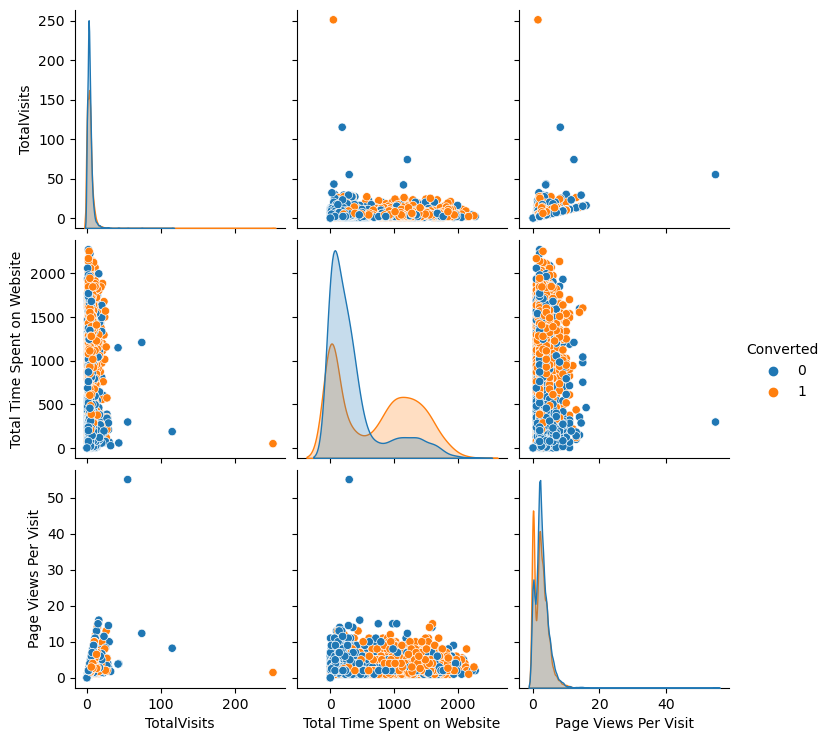

In [53]:
# Creating a dataframe for selected columns from leads dataframe and plotting pairplot
edu_df = lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(edu_df,diag_kind='kde',hue='Converted')
plt.show()

In [54]:
# importing power transformer and transforming edu_df
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformededu = pd.DataFrame(pt.fit_transform(edu_df))
transformededu.columns = edu_df.columns
transformededu.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Converted
0    -1.539988                    -1.532509             -1.534722  -0.962570
1     0.690854                     0.641870              0.230818  -0.962570
2    -0.219742                     1.262512             -0.019004   1.038885
3    -0.723932                     0.153656             -0.629842  -0.962570
4    -0.219742                     1.204175             -0.629842   1.038885

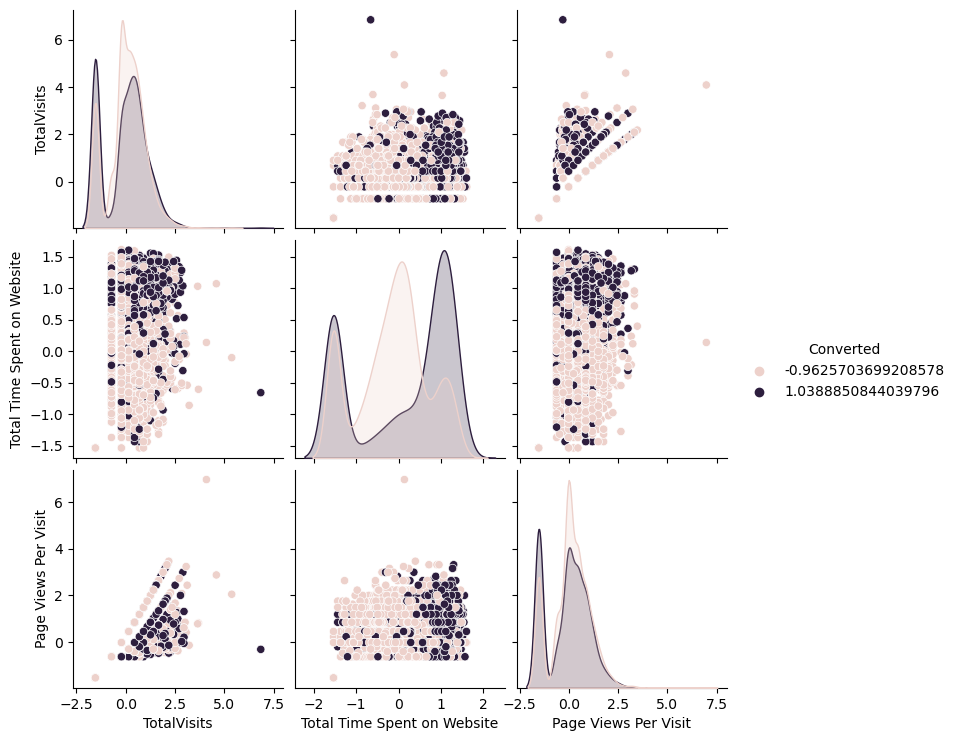

In [55]:
# plotting pair plot for transformededu 
sns.pairplot(transformededu,diag_kind='kde',hue='Converted')
plt.show()

### Dummy variable creation for categorical variables

In [57]:
# using info to check columns which are of object type
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   object 
 

In [58]:
# Creating dummy variables using get_dummy
dummy = pd.get_dummies(lead_df[['Lead Origin','Lead Source','Do Not Email','Last Activity',
                                'What is your current occupation',
                                'A free copy of Mastering The Interview','Last Notable Activity']],
                      drop_first=True)
# using concat to add dummies to original lead_df
lead_df=pd.concat([lead_df,dummy],axis=1)

In [59]:
# since column specialisation have various value counts so we have to create seperate 
# dummies for it
lead_df.Specialization.value_counts()

Specialization
Select                               1838
Finance Management                    745
Human Resource Management             665
Marketing Management                  663
Operations Management                 391
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 122
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: count, dtype: int64

In [60]:
# creating dummy for Specialization column
dummy_spcl = pd.get_dummies(lead_df['Specialization'],prefix='Specialization')
dummy_spcl = dummy_spcl.drop(['Specialization_Select'],axis=1)
# using concat to add lead_df and dummy_spcl
lead_df= pd.concat([lead_df,dummy_spcl],axis=1)

In [61]:
# checking dataframe
lead_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
0              Modified                                False   
1          Email Opened                                False   
2          Email Opened                                 True   
3              Modified                                 True   
4              Modified                                 True   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                      False                    False   
1                      False                    False   
2                      False                    False   
3                      False                    False   
4                      False                    False   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                       False                 False               False   
1                       False                 False               False   
2                        True                 False               False   
3                        True                 False               False   
4                       False                 False                True   

   Lead Source_Live Chat  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                  False                    True                       False   
1                  False                   False                        True   
2                  False                   False                       False   
3                  False                   False                       False   
4                  False                   False                       False   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                          False                      False   
4                          False                      False   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                  False                       False   
1                  False                       False   
2                  False                       False   
3                  False                       False   
4                  False                       False   

   Lead Source_

In [62]:
# Dropping variables for which we have created dummies
lead_df = lead_df.drop(['Lead Origin','Lead Source','Do Not Email','Last Activity','Specialization',
                                'What is your current occupation',
                                'A free copy of Mastering The Interview','Last Notable Activity'],axis=1)

In [63]:
# Checking dataframe
lead_df.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                    False                       False                 False   
1                    False                       False                 False   
2                    False                        True                 False   
3                    False                        True                 False   
4                    False                       False                 False   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0               False                  False                    True   
1               False                  False                   False   
2               False                  False                   False   
3               False                  False                   False   
4                True                  False                   False   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                       False                          False   
1                        True                          False   
2                       False                          False   
3                       False                          False   
4                       False                          False   

   Lead Source_Press_Release  Lead Source_Reference  \
0                      False                  False   
1                      False                  False   
2                      False                  False   
3                      False                  False   
4                      False                  False   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                       False                     False                False   
1                       False                     False                False   
2                       False                     False                False   
3                       False                     False                False   
4                       False                     False                False   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                         False             False                False   
1                         False             False                False   
2                         False             False                False   
3                         False             False                False   
4                         False             False                False   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0             False                            False   
1             False                            False   
2             False                            False   
3             False                            False   
4             False                             True   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                        False                             False   
1                        False                             False   
2         

### Train Test Split data 

In [64]:
# importing library
from sklearn.model_selection import train_test_split


In [65]:
# placing target variable into y
y= lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# placing all variables except target variables to X
X=lead_df.drop(['Converted'], axis=1).astype('int') 
# i am using astype to convert true and false to 1 and 0
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0            0                            0                     0   
1            5                          674                     2   
2            2                         1532                     2   
3            1                          305                     1   
4            2                         1428                     1   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3       

In [67]:
# splitting the data to train and test in ratio of 70 % and 30%
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,random_state=100)

### Scaling
There are certain numerical variables have different scales so we can convert them to same scale.

In [68]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler 

In [69]:
# Scaling variables on different scales to same scale
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003     0.015936                     0.029489                 0.125   
218      0.015936                     0.082306                 0.250   
4171     0.023904                     0.034331                 0.375   
4037     0.000000                     0.000000                 0.000   
3660     0.000000                     0.000000                 0.000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
8003                     0                   0                      0   
218                      0                   0                      0   
4171                     0                   0                      0   
4037                     0                   0                      0   
3660                     0                   0                      0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
8003                       0                           0   
218                        0                           0   
4171                       0                           0   
4037                       1                           0   
3660                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
8003                              0                          0   
218                               0                          0   
4171                              0                          0   
4037                              0                          0   
3660                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
8003                      0                           0   
218                       0                           0   
4171                      0                           0   
4037                      0                           0   
3660                      1                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
8003                         0                    0   
218                          0                    0   
4171                         0                    0   
4037                         0                    0   
3660                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
8003                             0                 0                    0   
218                              0                 0                    0   
4171                             0                 0                    0   
4037                             0                 0                    0   
3660                             0                 0                    0   

      Do Not Email_Yes  Last Activity_Converted to Lead  \
8003                 0                                0   
218                  0                                0   
4171                 0                                0   
4037                 0                                0   
3660                 0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
8

### Checking Correlation and generating heat map

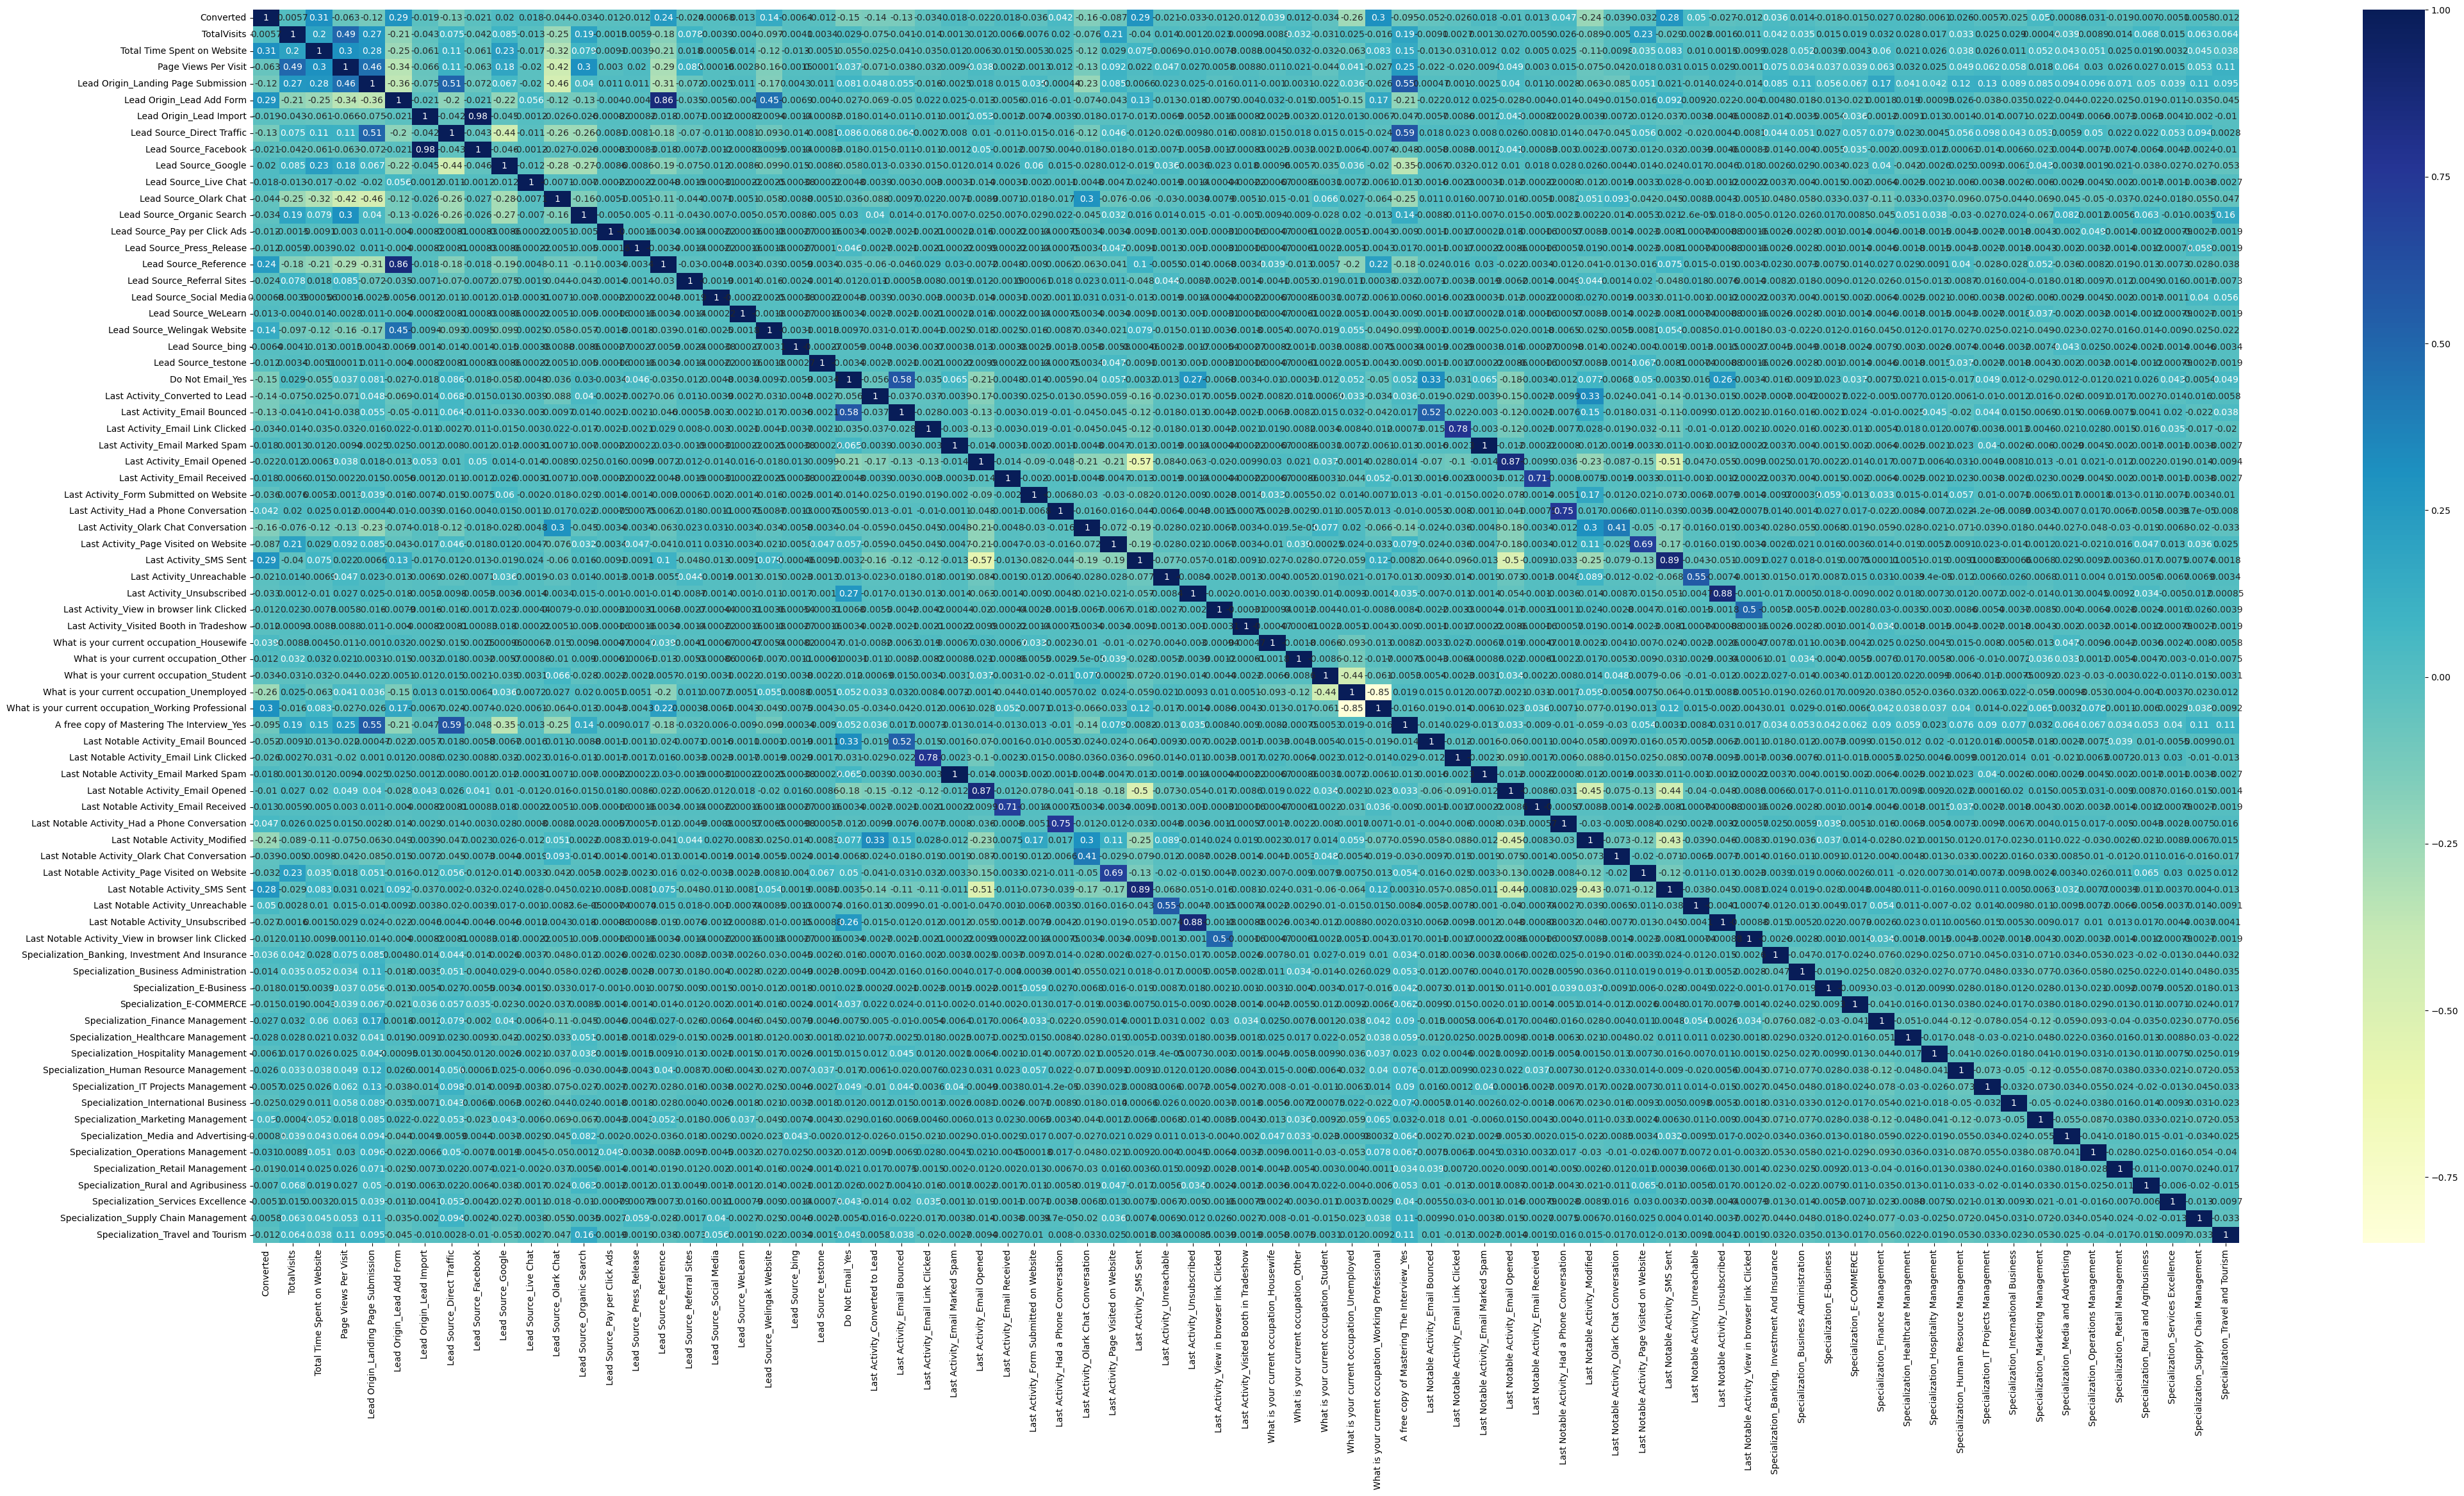

In [70]:
plt.figure(figsize=[50,25])
sns.heatmap(lead_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Step 4:- Model Building

Since we have a lot of featues to deal with so before model building we can use automated approch using RFE to remove certain features

In [71]:
# Import LogisticRegression and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [72]:
# Import RFE and selecting 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)    # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [73]:
# looking at features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [74]:
# Placing all the columns selected by RFE in the variable col

col = X_train.columns[rfe.support_]

In [75]:
# Selecting only the columns selected by RFE

X_train = X_train[col]

Since we have selected features using RFE now with help of statistics (VIF,p-value) we will further analyse our model
for this we are using stats model

In [76]:
# Importing statsmodels

import statsmodels.api as sm

In [77]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 20 Feb 2024   Deviance:                       4145.5
Time:                        11:19:12   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

Since few variables have p-values >0.05 but before elimination of those variables we will also check for VIF

In [78]:
# Import variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                           Lead Origin_Lead Add Form  84.19
4                               Lead Source_Reference  65.18
5                        Lead Source_Welingak Website  20.03
11         What is your current occupation_Unemployed   3.65
7              Last Activity_Had a Phone Conversation   2.44
13     Last Notable Activity_Had a Phone Conversation   2.43
1                         Total Time Spent on Website   2.38
0                                         TotalVisits   1.62
8                              Last Activity_SMS Sent   1.59
12  What is your current occupation_Working Profes...   1.56
3                              Lead Source_Olark Chat   1.44
6                                    Do Not Email_Yes   1.09
10            What is your current occupation_Student   1.09
9           What is your current occupation_Housewife   1.01
14                  Last Notable Activity_Unreachable   1.01

Since VIF and p-values for Lead Source_Reference is very high so lets first drop it and check VIFs again

In [80]:
X_train.drop(['Lead Source_Reference'], axis = 1, inplace = True)

In [81]:
# Re-fit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 20 Feb 2024   Deviance:                       4146.5
Time:                        11:19:18   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [82]:
# Make a VIF dataframe for all the variables present after removal 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_Unemployed  3.65
6              Last Activity_Had a Phone Conversation  2.44
12     Last Notable Activity_Had a Phone Conversation  2.43
1                         Total Time Spent on Website  2.38
2                           Lead Origin_Lead Add Form  1.71
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
9             What is your current occupation_Student  1.09
8           What is your current occupation_Housewife  1.01
13                  Last Notable Activity_Unreachable  1.01

Since VIFs of all variables are below 5 so we can drop variables having high p-values.\
first to drop is Last Notable Activity_Had a Phone Conversation

In [83]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [84]:
# Re-fit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Tue, 20 Feb 2024   Deviance:                       4152.2
Time:                        11:19:21   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

Since p-value for What is your current occupation_Housewife is high so we will drop this variable.

In [85]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)


In [86]:
# Re-fit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 20 Feb 2024   Deviance:                       4156.7
Time:                        11:19:23   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

Since p-value for What is your current occupation_Working Professional is high so we will drop this variable.


In [87]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)


In [88]:
# Re-fit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 20 Feb 2024   Deviance:                       4158.1
Time:                        11:19:25   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

## Step 5:- Model Evaluation

Since VIFs and p-values are within good range so we can now evaluate our model

In [89]:
# Use predict to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [90]:
# Reshaping y_train_pred into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

#### Creating a dataframe containing the actual conversion and probabilities predicted by the model

In [91]:
# Create a dataframe containing the actual conversion and probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.300117
1          0         0.142002
2          1         0.127629
3          1         0.291558
4          1         0.954795

#### Creating new column Predicted with 1 if Conversion_Prob > 0.5 else 0

In [92]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Checking the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.300117          0
1          0         0.142002          0
2          1         0.127629          0
3          1         0.291558          0
4          1         0.954795          1

In [93]:
# Importing metrics from sklearn for evaluation

from sklearn import metrics

In [94]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [95]:
# Predicted     not_churn    churn
# Actual
# not_churn        1929      383
# churn            560       1589  

In [96]:
# checking the overall accuracy

print(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),4))

0.7886


In [97]:
# evaluating the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# To find senstivity
round(TP/float(TP+FN),4)

0.7394

In [99]:
# To find specificity
round(TN/float(TN+FP),4)

0.8343

#### Finding the Optimal Cutoff
Since 0.5 was just arbitrary to loosely check the model performace. But to get good results, we need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [100]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example\n')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [101]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

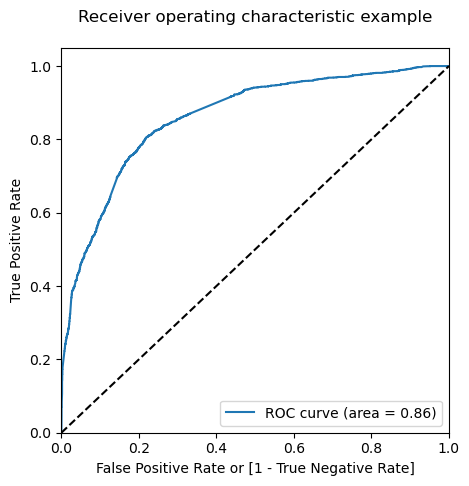

In [102]:
# calling ROC function to draw ROC
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is good.Let's also check the sensitivity and specificity to find the optimal cutoff point.

In [103]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [104]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


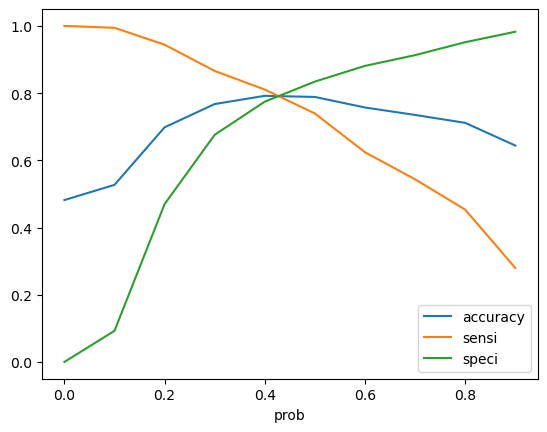

In [105]:
# Let's plot accuracy,sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

In [106]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [107]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),4)

0.7909

In [108]:
# Creating confusion metrics
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [109]:
# Evaluating the metrics
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [110]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),4)

0.7934

In [111]:
# Let us calculate specificity
round(TN / float(TN+FP),4)

0.7885

In [112]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(round(FP/float(TN+FP),4))

0.2115


In [113]:
# Positive predictive value 
print(round(TP / float(TP+FP),4))

0.7771


In [114]:
# Negative predictive value
print(round(TN / float(TN+ FN),4))

0.8041


## Step 6:- Making Predictions on the Test Set

In [115]:
# Scaling the test set as well using transform

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [116]:
# Select the columns in X_train for X_test

X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4771     0.000000                     0.000000                          1   
6122     0.027888                     0.029049                          0   
9202     0.015936                     0.416813                          0   
6570     0.011952                     0.378961                          0   
2668     0.031873                     0.395246                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                  1      
6122                                                  0      
9202                                                  0      
6570                                                  0      
2668                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [117]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [118]:
# Checking X_test_sm

X_test_sm

const  TotalVisits  Total Time Spent on Website  \
4771    1.0     0.000000                     0.000000   
6122    1.0     0.027888                     0.029049   
9202    1.0     0.015936                     0.416813   
6570    1.0     0.011952                     0.378961   
2668    1.0     0.031873                     0.395246   
...     ...          ...                          ...   
5828    1.0     0.011952                     0.027289   
6583    1.0     0.011952                     0.152289   
5531    1.0     0.055777                     0.702025   
3056    1.0     0.011952                     0.417694   
4088    1.0     0.019920                     0.530370   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
4771                          1                       0   
6122                          0                       0   
9202                          0                       0   
6570                          0                       0   
2668                          0                       0   
...                         ...                     ...   
5828                          0                       0   
6583                          0                       0   
5531                          0                       0   
3056                          0                       0   
4088                          0                       0   

      Lead Source_Reference  Lead Source_Welingak Website  Do Not Email_Yes  \
4771                      1                             0                 0   
6122                      0                             0                 0   
9202                      0                             0                 0   
6570                      0                             0                 1   
2668                      0                             0                 0   
...                     ...                           ...               ...   
5828                      0                             0                 0   
6583                      0                             0                 0   
5531                      0                             0                 0   
3056                      0                             0                 1   
4088                      0                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   
...                                      ...                     ...   
5828                                       0                       1   
6583                                       0                       1   
5531                                       0                       0   
3056                                       0                       1   
4088                                       0                       0   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   
...                                         ...   
5828                                          0   
6583                                          0   
5531                                          0   
3056                                          0   
4088                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                  

In [119]:
# Droping the columns from X_test 

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], axis=1, inplace = True)

In [120]:
# Making predictions on the test set and store it in the variable y_test_pred

y_test_pred = res.predict(sm.add_constant(X_test))

In [121]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [122]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [123]:
# Let's check the head
y_pred_1.head()

0
4771  0.996296
6122  0.129992
9202  0.703937
6570  0.299564
2668  0.720796

In [124]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [125]:
# Removing index for both dataframes to concat them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [126]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [127]:
# Checking y_pred_final

y_pred_final.head()

Converted         0
0          1  0.996296
1          0  0.129992
2          0  0.703937
3          1  0.299564
4          1  0.720796

In [128]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [129]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996296
1          0         0.129992
2          0         0.703937
3          1         0.299564
4          1         0.720796

In [130]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [131]:
# Checking y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996296                1
1          0         0.129992                0
2          0         0.703937                1
3          1         0.299564                0
4          1         0.720796                1

In [132]:
# Let's check the overall accuracy

round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted),4)

0.7845

In [133]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[786, 210],
       [202, 714]], dtype=int64)

In [134]:
# Evaluating the metrics
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),4)

0.7795

In [136]:
# Let us calculate specificity
round(TN / float(TN+FP),4)

0.7892

### Precision and Recall View

In [137]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

In [138]:
# Evaluating the metrics
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

Precision\
TP / TP + FP

In [139]:
round(confusion[1,1]/(confusion[0,1]+confusion[1,1]),4)

0.8058

Recall\
TP / TP + FN

In [140]:
round(confusion[1,1]/(confusion[1,0]+confusion[1,1]),4)

0.7394

### Precision and recall tradeoff

In [141]:
from sklearn.metrics import precision_recall_curve

In [142]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [143]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

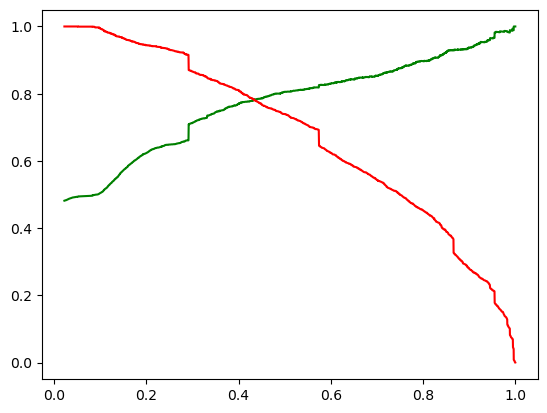

In [144]:
# plotting precision and recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [145]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [146]:
# Let's check the accuracy now

round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),4)

0.7909

In [147]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [148]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
# Calculate Precision

round(TP/(TP+FP),4)

0.7771

In [150]:
# Calculate Recall

round(TP/(TP+FN),4)

0.7934

### Making Predictions on the Test Set

In [151]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [152]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [153]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [154]:
# Let's see the head

y_pred_1.head()

0
4771  0.996296
6122  0.129992
9202  0.703937
6570  0.299564
2668  0.720796

In [155]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [156]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# Concating y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [158]:
# Checking y_pred_final

y_pred_final.head()

Converted         0
0          1  0.996296
1          0  0.129992
2          0  0.703937
3          1  0.299564
4          1  0.720796

In [159]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [160]:
# Let's check the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996296
1          0         0.129992
2          0         0.703937
3          1         0.299564
4          1         0.720796

In [161]:
# Making predictions on the test set using 0.42as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [162]:
# Checking y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996296                1
1          0         0.129992                0
2          0         0.703937                1
3          1         0.299564                0
4          1         0.720796                1

In [163]:
# Let's check the overall accuracy

round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted),4)

0.7845

In [164]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[786, 210],
       [202, 714]], dtype=int64)

In [165]:
# Let's evaluate the other metrics as well
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [166]:
# Calculating Precision

round(TP/(TP+FP),4)

0.7727

In [167]:
# Calculating Recall

round(TP/(TP+FN),4)

0.7795